# Financial Data Project

<b>Author:</b> Piotr Drużdżel <br>
<b>E-mail:</b> piotr.druzdzel@gmail.com

<b>Main objective:</b> to practice Pandas and visualization techniques

<b>Data source:</b> Yahoo Finance and Stooq.pl

<b>Analysis concerns the following stocks:</b> <br>

<b>Banks:</b> <br>
Bank of America <br>
CitiGroup <br>
Goldman Sachs <br>
JPMorgan Chase <br>
Morgan Stanley <br>
Wells Fargo <br>

<b>Tech Companies:</b> <br>
Apple CitiGroup <br>
Microsoft CitiGroup <br>
Netflix <br>
Google <br>
Amazon <br>

<b>Pharmaceutical Companies:</b> <br>
Sanofi <br>
Novartis <br>

<b>Automotive/Aerospace Companies:</b> <br>
Airbus <br>
Delta Airlines <br>
BMW <br>

## Getting the data

Importing the basic libraries:

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\PDL3\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


Setting up the time-frame of interest for the API:

In [2]:
from datetime import datetime

start = datetime(2006, 1, 1)
end = datetime(2020, 5, 28)

Extracting data from Yahoo Finance via "get_data_yahoo" from pandas_datareader.data:

In [3]:
# Bank of America
BAC = data.get_data_yahoo('BAC',start,end)
#CitiGroup
C = data.get_data_yahoo('C',start,end)
#Goldman Sachs
GS = data.get_data_yahoo('GS',start,end)
#JPMorgan Chase
JPM = data.get_data_yahoo('JPM',start,end)
#Morgan Stanley
MS = data.get_data_yahoo('MS',start,end)
#Wells Fargo
WFC = data.get_data_yahoo('WFC',start,end)

Creating the list of bank symbols:

In [4]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

Checking the format:

In [5]:
BAC

High        Low       Open      Close       Volume  Adj Close
Date                                                                          
2006-01-03  47.180000  46.150002  46.919998  47.080002   16296700.0  35.298687
2006-01-04  47.240002  46.450001  47.000000  46.580002   17757900.0  34.923801
2006-01-05  46.830002  46.320000  46.580002  46.639999   14970700.0  34.968796
2006-01-06  46.910000  46.349998  46.799999  46.570000   12599800.0  34.916302
2006-01-09  46.970001  46.360001  46.720001  46.599998   15619400.0  34.938789
...               ...        ...        ...        ...          ...        ...
2020-05-21  23.270000  22.780001  22.809999  22.900000   57726000.0  22.900000
2020-05-22  22.950001  22.459999  22.930000  22.660000   48107000.0  22.660000
2020-05-26  24.600000  23.700001  23.750000  24.280001  119485500.0  24.280001
2020-05-27  26.170000  24.969999  26.070000  25.980000  117672700.0  25.980000
2020-05-28  26.139999  24.790001  26.080000  24.860001   84340800.0  24.860001

[3625 rows x 6 columns]

Concatenating the bank dataframes together to a single data frame. <br>
Setting the keys argument equal to the tickers list (using the passed keys as the outermost level). <br>
Setting the names for the levels in the resulting hierarchical index:

In [6]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], keys=tickers, axis=1, names=['Bank Ticker', 'Stock Info'])
bank_stocks

Bank Ticker        BAC                                                \
Stock Info        High        Low       Open      Close       Volume   
Date                                                                   
2006-01-03   47.180000  46.150002  46.919998  47.080002   16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002   17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999   14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000   12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998   15619400.0   
...                ...        ...        ...        ...          ...   
2020-05-21   23.270000  22.780001  22.809999  22.900000   57726000.0   
2020-05-22   22.950001  22.459999  22.930000  22.660000   48107000.0   
2020-05-26   24.600000  23.700001  23.750000  24.280001  119485500.0   
2020-05-27   26.170000  24.969999  26.070000  25.980000  117672700.0   
2020-05-28   26.139999  24.790001  26.080000  24.860001   84340800.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.298687  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.923801  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.968796  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.916302  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.938789  487.399994  483.000000  486.000000  483.899994  ...   
...                ...         ...         ...         ...         ...  ...   
2020-05-21   22.900000   45.790001   44.779999   45.169998   45.000000  ...   
2020-05-22   22.660000   45.049999   43.689999   44.770000   44.099998  ...   
2020-05-26   24.280001   48.900002   45.980000   46.200001   48.169998  ...   
2020-05-27   25.980000   52.389999   49.860001   51.680000   52.259998  ...   
2020-05-28   24.860001   53.009998   49.110001   52.990002   49.160000  ...   

Bank Ticker         MS                                          WFC  \
Stock Info        Open      Close      Volume  Adj Close       High   
Date                                                                  
2006-01-03   57.169998  58.310001   5377000.0  37.429329  31.975000   
2006-01-04   58.700001  58.349998   7977800.0  37.455013  31.820000   
2006-01-05   58.549999  58.509998   5778000.0  37.557716  31.555000   
2006-01-06   58.770000  58.570000   6889800.0  37.596241  31.775000   
2006-01-09   58.630001  59.189999   4144500.0  37.994202  31.825001   
...                ...        ...         ...        ...        ...   
2020-05-21   40.770000  40.299999   9654200.0  40.299999  24.850000   
2020-05-22   40.230000  40.130001   6468900.0  40.130001  24.490000   
2020-05-26   41.869999  43.689999  19709900.0  43.689999  26.510000   
2020-05-27   45.779999  46.860001  25892400.0  46.860001  28.260000   
2020-05-28   47.250000  44.400002  17615900.0  44.400002  28.370001   

Bank Ticker                                                          
Stock Info         Low       Open      Close      Volume  Adj Close  
Date                                                                 
2006-01-03   31.195000  31.600000  31.900000  11016400.0  20.408512  
2006-01-04   31.365000  31.799999  31.530001  10870000.0  20.171795  
2006-01-05   31.309999  31.500000  31.495001  10158000.0  20.149401  
2006-01-06   31.385000  31.580000  31.680000   8403800.0  20.267757  
2006-01-09   31.555000  31.674999  31.674999   5619600.0  20.264565  
...                ...        ...        ...         ...        ...  
2020-05-21   24.320000  24.389999  24.459999  28376500.0  24.459999  
2020-05-22   23.920000  24.440001  24.170000  30415300.0  24.170000  
2020-05-26   25.040001  25.049999  26.260000  57720300.0  26.260000  
2020-05-27   26.840000  27.799999  27.950001  619

Another way of setting the columns names levels (already done in the line above):

In [7]:
#bank_stocks.columns.names = ['Bank Ticker','Stock Info']

Quick result check so far:

In [8]:
bank_stocks

Bank Ticker        BAC                                                \
Stock Info        High        Low       Open      Close       Volume   
Date                                                                   
2006-01-03   47.180000  46.150002  46.919998  47.080002   16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002   17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999   14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000   12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998   15619400.0   
...                ...        ...        ...        ...          ...   
2020-05-21   23.270000  22.780001  22.809999  22.900000   57726000.0   
2020-05-22   22.950001  22.459999  22.930000  22.660000   48107000.0   
2020-05-26   24.600000  23.700001  23.750000  24.280001  119485500.0   
2020-05-27   26.170000  24.969999  26.070000  25.980000  117672700.0   
2020-05-28   26.139999  24.790001  26.080000  24.860001   84340800.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.298687  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.923801  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.968796  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.916302  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.938789  487.399994  483.000000  486.000000  483.899994  ...   
...                ...         ...         ...         ...         ...  ...   
2020-05-21   22.900000   45.790001   44.779999   45.169998   45.000000  ...   
2020-05-22   22.660000   45.049999   43.689999   44.770000   44.099998  ...   
2020-05-26   24.280001   48.900002   45.980000   46.200001   48.169998  ...   
2020-05-27   25.980000   52.389999   49.860001   51.680000   52.259998  ...   
2020-05-28   24.860001   53.009998   49.110001   52.990002   49.160000  ...   

Bank Ticker         MS                                          WFC  \
Stock Info        Open      Close      Volume  Adj Close       High   
Date                                                                  
2006-01-03   57.169998  58.310001   5377000.0  37.429329  31.975000   
2006-01-04   58.700001  58.349998   7977800.0  37.455013  31.820000   
2006-01-05   58.549999  58.509998   5778000.0  37.557716  31.555000   
2006-01-06   58.770000  58.570000   6889800.0  37.596241  31.775000   
2006-01-09   58.630001  59.189999   4144500.0  37.994202  31.825001   
...                ...        ...         ...        ...        ...   
2020-05-21   40.770000  40.299999   9654200.0  40.299999  24.850000   
2020-05-22   40.230000  40.130001   6468900.0  40.130001  24.490000   
2020-05-26   41.869999  43.689999  19709900.0  43.689999  26.510000   
2020-05-27   45.779999  46.860001  25892400.0  46.860001  28.260000   
2020-05-28   47.250000  44.400002  17615900.0  44.400002  28.370001   

Bank Ticker                                                          
Stock Info         Low       Open      Close      Volume  Adj Close  
Date                                                                 
2006-01-03   31.195000  31.600000  31.900000  11016400.0  20.408512  
2006-01-04   31.365000  31.799999  31.530001  10870000.0  20.171795  
2006-01-05   31.309999  31.500000  31.495001  10158000.0  20.149401  
2006-01-06   31.385000  31.580000  31.680000   8403800.0  20.267757  
2006-01-09   31.555000  31.674999  31.674999   5619600.0  20.264565  
...                ...        ...        ...         ...        ...  
2020-05-21   24.320000  24.389999  24.459999  28376500.0  24.459999  
2020-05-22   23.920000  24.440001  24.170000  30415300.0  24.170000  
2020-05-26   25.040001  25.049999  26.260000  57720300.0  26.260000  
2020-05-27   26.840000  27.799999  27.950001  619

In [9]:
bank_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3625 entries, 2006-01-03 to 2020-05-28
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (BAC, High)       3625 non-null   float64
 1   (BAC, Low)        3625 non-null   float64
 2   (BAC, Open)       3625 non-null   float64
 3   (BAC, Close)      3625 non-null   float64
 4   (BAC, Volume)     3625 non-null   float64
 5   (BAC, Adj Close)  3625 non-null   float64
 6   (C, High)         3625 non-null   float64
 7   (C, Low)          3625 non-null   float64
 8   (C, Open)         3625 non-null   float64
 9   (C, Close)        3625 non-null   float64
 10  (C, Volume)       3625 non-null   float64
 11  (C, Adj Close)    3625 non-null   float64
 12  (GS, High)        3625 non-null   float64
 13  (GS, Low)         3625 non-null   float64
 14  (GS, Open)        3625 non-null   float64
 15  (GS, Close)       3625 non-null   float64
 16  (GS, Volume)      3625 n

Classic check for missing values:

In [10]:
bank_stocks.isnull().sum()

Bank Ticker  Stock Info
BAC          High          0
             Low           0
             Open          0
             Close         0
             Volume        0
             Adj Close     0
C            High          0
             Low           0
             Open          0
             Close         0
             Volume        0
             Adj Close     0
GS           High          0
             Low           0
             Open          0
             Close         0
             Volume        0
             Adj Close     0
JPM          High          0
             Low           0
             Open          0
             Close         0
             Volume        0
             Adj Close     0
MS           High          0
             Low           0
             Open          0
             Close         0
             Volume        0
             Adj Close     0
WFC          High          0
             Low           0
             Open          0
             Close 

## Basic analysis with using cross-section method (DataFrame.xs):

The max Close price for each bank's stock throughout the time period:

In [11]:
bank_stocks.xs('Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     273.380005
JPM    141.089996
MS      89.300003
WFC     65.930000
dtype: float64

Creating a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. <br>
Returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [12]:
returns = pd.DataFrame()

Using pandas <b>pct_change()</b> method on the "Close" column to create a column representing this return value. <br>
From the documentation: <b>pct_change()</b> function calculates the percentage change between the current and a prior element.

Creating <b>for</b> loop that for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame:

In [13]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2006-01-03         NaN       NaN        NaN         NaN        NaN         NaN
2006-01-04   -0.010620 -0.018462  -0.013812   -0.014183   0.000686   -0.011599
2006-01-05    0.001288  0.004961  -0.000393    0.003029   0.002742   -0.001110
2006-01-06   -0.001501  0.000000   0.014169    0.007046   0.001025    0.005874
2006-01-09    0.000644 -0.004731   0.012030    0.016242   0.010586   -0.000158
...                ...       ...        ...         ...        ...         ...
2020-05-21   -0.000437 -0.010337  -0.007385   -0.012701  -0.018510   -0.002447
2020-05-22   -0.010480 -0.020000  -0.000944   -0.007763  -0.004218   -0.011856
2020-05-26    0.071492  0.092290   0.089646    0.070973   0.088712    0.086471
2020-05-27    0.070016  0.084908   0.069367    0.057921   0.072557    0.064356
2020-05-28   -0.043110 -0.059319  -0.040256   -0.014896  -0.052497   -0.026118

[3625 rows x 6 columns]

Maximum returns throughout this period:

In [14]:
returns.max()

BAC Return    0.352691
C Return      0.578249
GS Return     0.264678
JPM Return    0.250967
MS Return     0.869835
WFC Return    0.327645
dtype: float64

Average daily return:

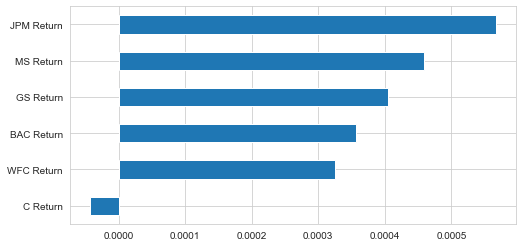

In [103]:
plt.figure(figsize=(8,4))
returns.mean().sort_values(ascending=True).plot(kind='barh')

Exploratory classic pairplot on the <b>returns</b> DataFrame to check for correlations:

A small update on "pairplot" method - it digests the NaN now, so it is not necessary to skip the first row with "returns[1:]"

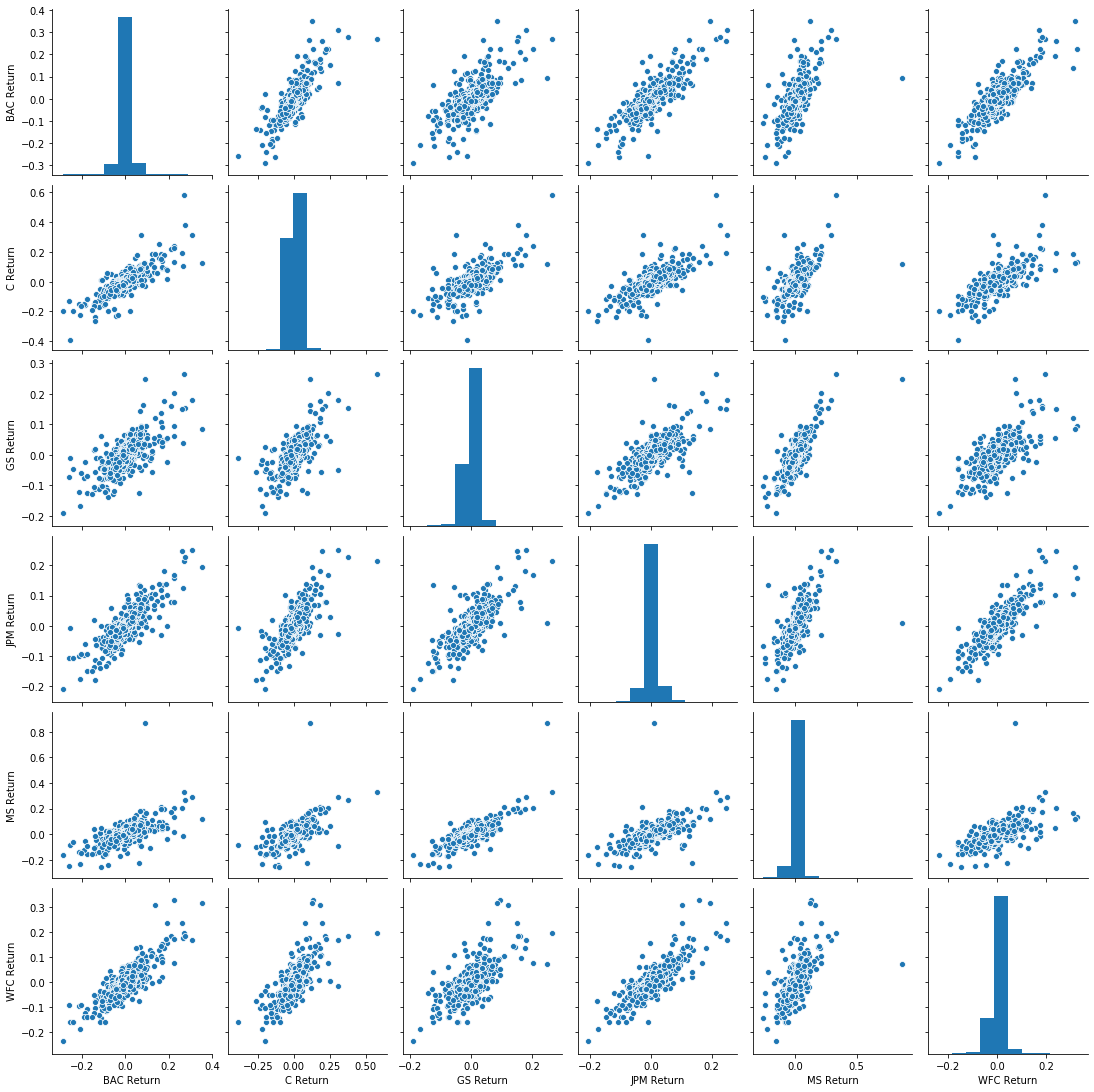

In [16]:
sns.pairplot(returns)

Searching on what dates each bank stock had the best and worst single day returns. <br>
<b>idxmin()</b> finds the index of the minimum value along the index axis.

In [17]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

2009-01-20 was Barack Obama's inaugurational day. Larger political changes usually have impack on the financial market.

Best Single Day Gain:

In [18]:
# It turns out that Citigroup stock split in May 2011, but also JPM day after inauguration:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [19]:
returns.loc['2011-05-09']

BAC Return   -0.010561
C Return     -0.023009
GS Return    -0.006529
JPM Return   -0.001776
MS Return    -0.006339
WFC Return   -0.001416
Name: 2011-05-09 00:00:00, dtype: float64

In [20]:
returns.loc['2008-11-24']

BAC Return    0.272014
C Return      0.578249
GS Return     0.264678
JPM Return    0.213908
MS Return     0.331343
WFC Return    0.195772
Name: 2008-11-24 00:00:00, dtype: float64

Looking a standard deviation of the returns we classify the riskiest over the entire time period:

In [21]:
returns.std()

BAC Return    0.032755
C Return      0.034618
GS Return     0.023820
JPM Return    0.025260
MS Return     0.033779
WFC Return    0.027474
dtype: float64

It looks like CitiGroup, which indeed had a big crash has the largest 'dispersion' of the returns.

By looking at the 'risk profile' outside of crisis, e.g. in 2015, it looks quite similar:

In [22]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

A distplot using seaborn of the 2015 returns for Morgan Stanley:

In [23]:
returns.loc['2015-01-01':'2015-12-31']['MS Return']

Date
2015-01-02   -0.002320
2015-01-05   -0.031258
2015-01-06   -0.028800
2015-01-07    0.014278
2015-01-08    0.014889
                ...   
2015-12-24   -0.003681
2015-12-28   -0.009544
2015-12-29    0.011812
2015-12-30   -0.009831
2015-12-31   -0.013031
Name: MS Return, Length: 252, dtype: float64

### CitiGroup in 2006:

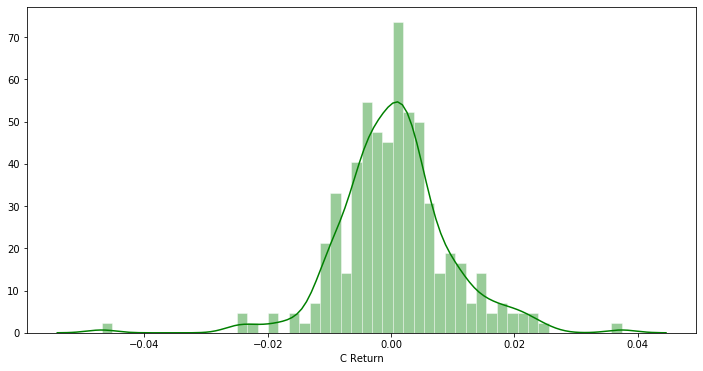

In [24]:
plt.figure(figsize=(12,6))
sns.distplot(returns.loc['2006-01-01':'2006-12-31']['C Return'], 
             color='green', 
             bins=50,  
             hist_kws=dict(edgecolor="w", linewidth=1)
            )

Standard deviation of:

In [25]:
returns.loc['2006-01-01':'2006-12-31']['C Return'].std()

0.009075150094967727

### CitiGroup in 2015:

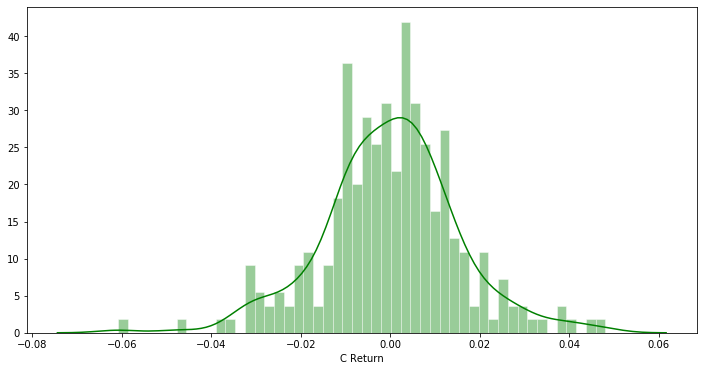

In [26]:
plt.figure(figsize=(12,6))
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['C Return'], 
             color='green', 
             bins=50,  
             hist_kws=dict(edgecolor="w", linewidth=1)
            )

Standard deviation of:

In [27]:
returns.loc['2015-01-01':'2015-12-31']['C Return'].std()

0.015289387324415937

Looks rather symmetric with few outliers, but when we look at CitiGroup, it is more skewed to the right (right thinner tail):

### CitiGroup in 2008:

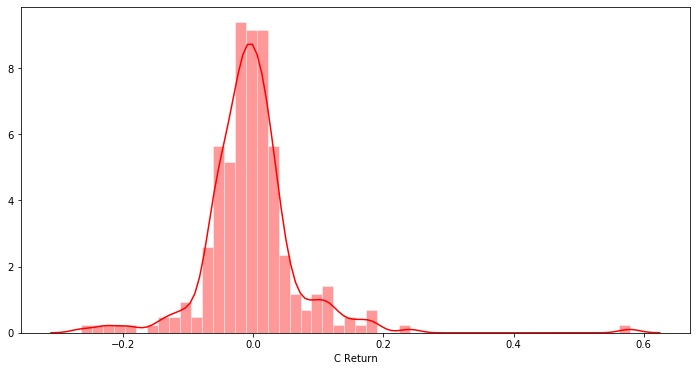

In [28]:
plt.figure(figsize=(12,6))
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'], 
             color='red', 
             bins=50,  
             hist_kws=dict(edgecolor="w", linewidth=1))

Standard deviation of:

In [29]:
returns.loc['2008-01-01':'2008-12-31']['C Return'].std()

0.07352335695499639

### CitiGroup in 2020:

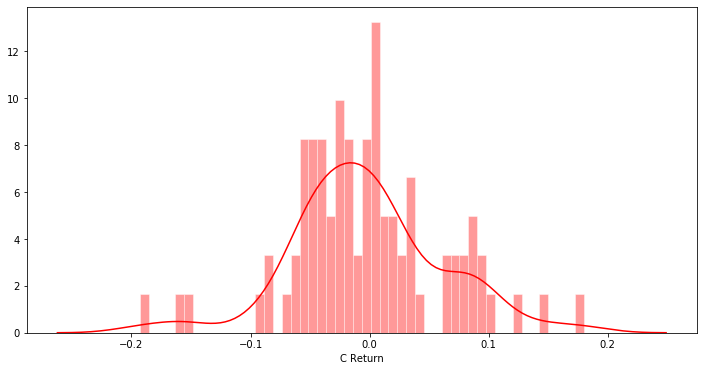

In [30]:
plt.figure(figsize=(12,6))
sns.distplot(returns.loc['2020-02-01':'2020-05-28']['C Return'], 
             color='red', 
             bins=50,  
             hist_kws=dict(edgecolor="w", linewidth=1))

Standard deviation of:

In [31]:
returns.loc['2020-01-01':'2020-12-31']['C Return'].std()

0.0571746505052404

So far (29th of May 2020) the standard deviation of the returns is almost as high as in the financial crisis outbreak year of 2008.

## Stock trends:

In [32]:
sns.set_style('whitegrid')

import plotly
import cufflinks as cf
cf.go_offline()

 A line plot showing Close price for each bank for the entire index of time:

Text(0, 0.5, 'Closing price')

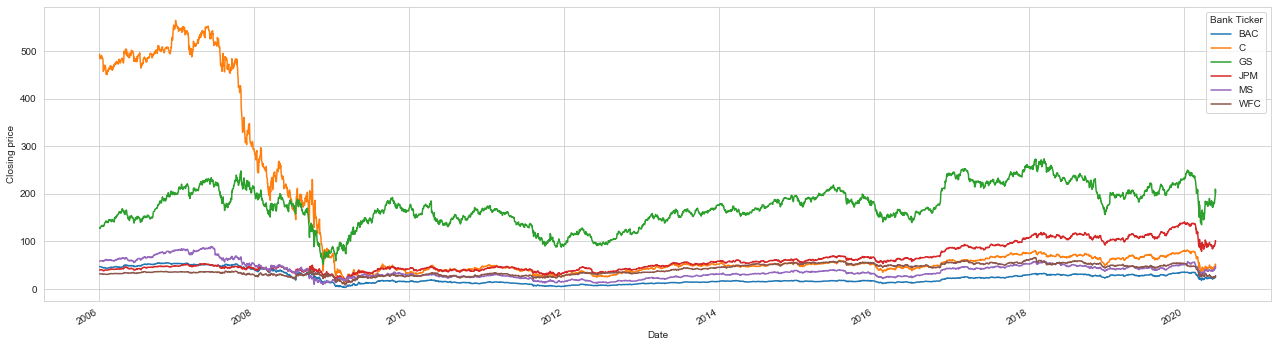

In [33]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').plot(figsize=(22,6))
plt.ylabel('Closing price')

Another, more traditional way would be:

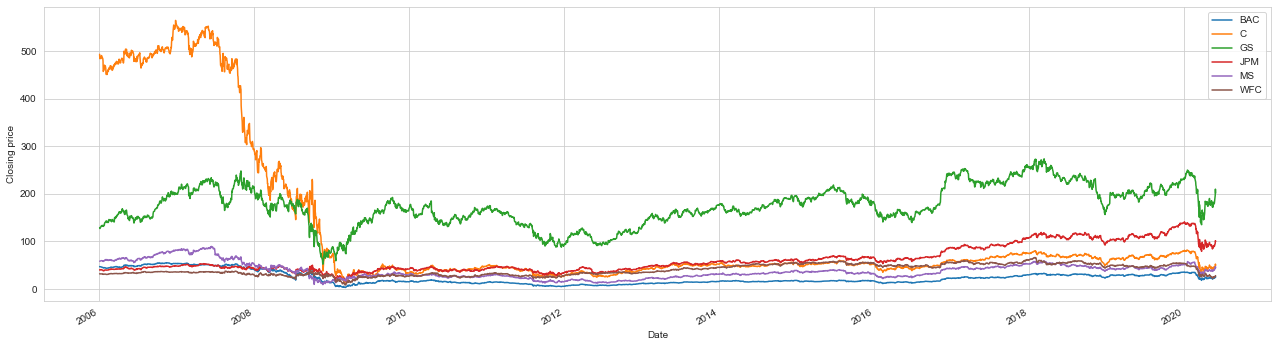

In [34]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(22,6), label=tick)
plt.ylabel('Closing price')
plt.legend()

Using more interactive way, like 'iplot' from plotly:

In [35]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

By looking on the above plots, we can see, that the market drop so far has been still relatively low w.r.t. the past, 2008 (although different) crisis.

The status on the 29th of May 2020 about the COVID-19 crisis it that the market dip is slowly emerging out of the recession in a "V-shape", however, many investors are sceptical and expect further declines as the economies are ailing. <br>
High levels from January 2020 on the financial market might be a region of interest. If the market fails to go above them, it can be sign for a potential decline again and an indication of inverors' fear of the second wave of the COVID-19 virus.

## Moving averages

The rolling 30 day average against the Close Price for Bank of America's stock for the period around crisis outbreak:

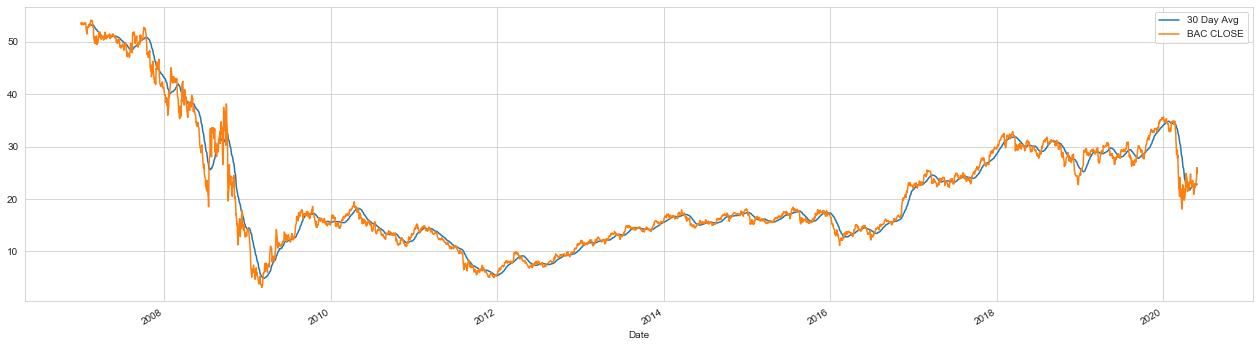

In [36]:
plt.figure(figsize=(22,6))
BAC['Close'].loc['2007-01-01':'2020-05-28'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2007-01-01':'2020-05-28'].plot(label='BAC CLOSE')
plt.legend()

Comparing the scale of the collapse between CitiGroup and Bank of America:

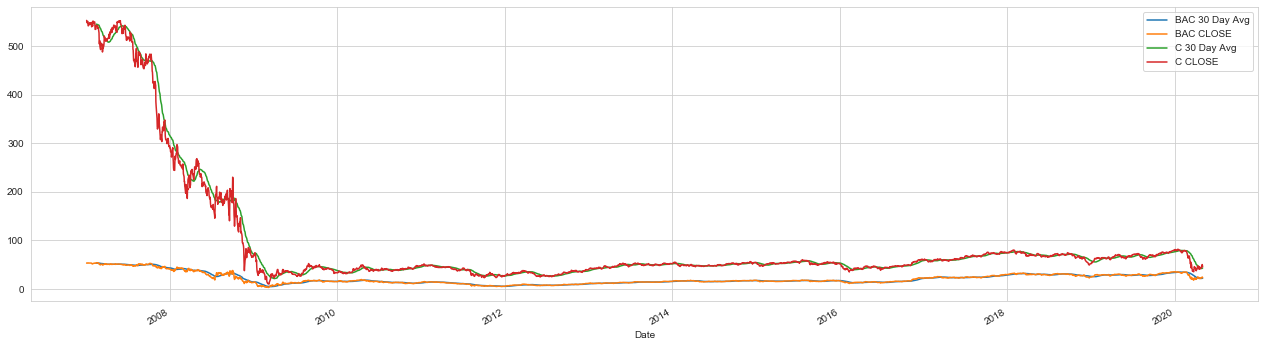

In [37]:
plt.figure(figsize=(22,6))
BAC['Close'].loc['2007-01-01':'2020-05-01'].rolling(window=30).mean().plot(label='BAC 30 Day Avg')
BAC['Close'].loc['2007-01-01':'2020-05-01'].plot(label='BAC CLOSE')
C['Close'].loc['2007-01-01':'2020-05-01'].rolling(window=30).mean().plot(label='C 30 Day Avg')
C['Close'].loc['2007-01-01':'2020-05-01'].plot(label='C CLOSE')
plt.legend()

A heatmap of the correlation between the stocks Close Price:

Creating the correlation matrix with <b>.corr()</b>:

In [38]:
close_prices_corr = bank_stocks.xs(key = 'Close', axis=1, level='Stock Info').corr()

Actual heatmap:

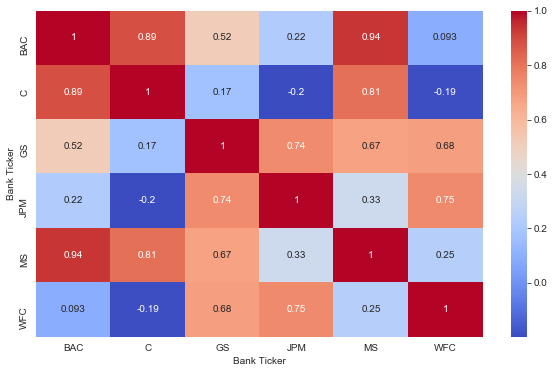

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(close_prices_corr, cmap='coolwarm', annot=True)

And clustermap:

<Figure size 720x432 with 0 Axes>

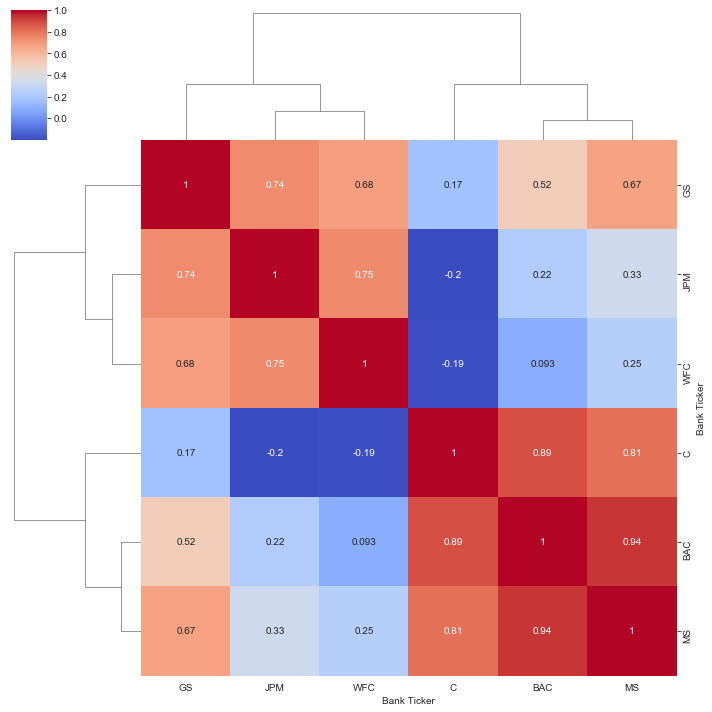

In [40]:
plt.figure(figsize=(10,6))
sns.clustermap(close_prices_corr, cmap='coolwarm', annot=True)

Above clustermap shows that Morgan Stanley is strongly correlated with Bank of America.

In [41]:
returns.corr()

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
BAC Return    1.000000  0.816388   0.712262    0.830719   0.676130    0.830435
C Return      0.816388  1.000000   0.698210    0.763622   0.665399    0.732465
GS Return     0.712262  0.698210   1.000000    0.761148   0.814723    0.683612
JPM Return    0.830719  0.763622   0.761148    1.000000   0.680288    0.829759
MS Return     0.676130  0.665399   0.814723    0.680288   1.000000    0.627806
WFC Return    0.830435  0.732465   0.683612    0.829759   0.627806    1.000000

In [42]:
returns_corr = returns.corr()

<Figure size 720x432 with 0 Axes>

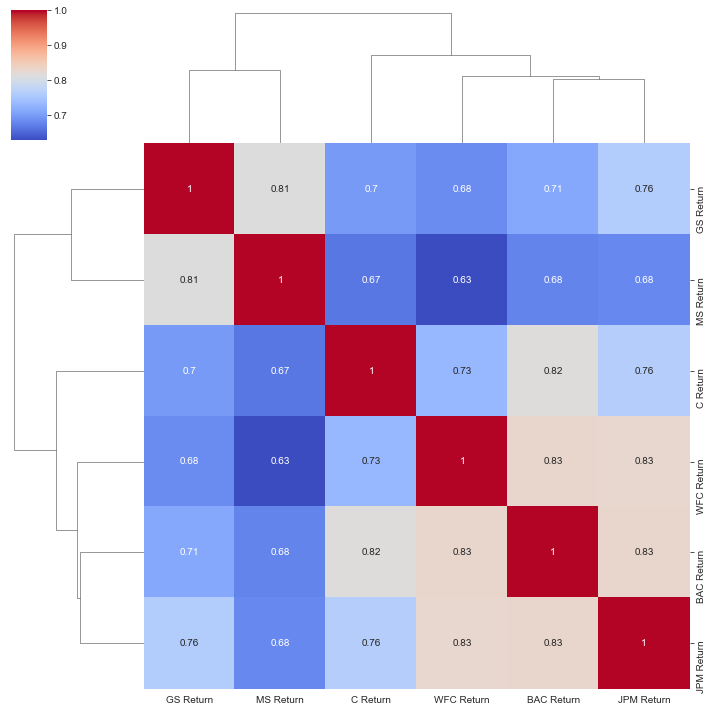

In [43]:
plt.figure(figsize=(10,6))
sns.clustermap(returns_corr, cmap='coolwarm', annot=True)

In terms of returns (computed with "pct_change()"), it looks like JPM, BAC and WFC are correlated stronger than GS, MS and Citigroup.

In [44]:
returns.loc['2008-10-10':'2008-10-20']

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2008-10-10    0.063169  0.091261  -0.123828    0.135224  -0.222490    0.038899
2008-10-13    0.091998  0.116230   0.250000    0.008405   0.869835    0.073826
2008-10-14    0.164107  0.182222   0.107207   -0.030484   0.212155    0.102632
2008-10-15   -0.102149 -0.128357  -0.079333   -0.054532  -0.173655   -0.005072
2008-10-16    0.018052 -0.020333  -0.006628    0.051962   0.030888    0.016492
2008-10-17   -0.041649 -0.064151   0.016904   -0.028649   0.029427   -0.054277
2008-10-20    0.049914  0.014113   0.062992    0.033816   0.027547    0.005303

## Financial crisis in 2008:

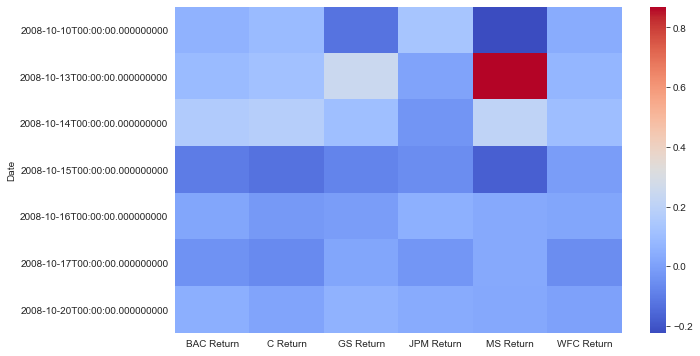

In [45]:
plt.figure(figsize=(10,6))
sns.heatmap(returns.loc['2008-10-10':'2008-10-20'], cmap='coolwarm')

It looks mlike on the 13th of October 2008, Morgan stanley was affected the most.

## COVID-19 crisis in 2020:

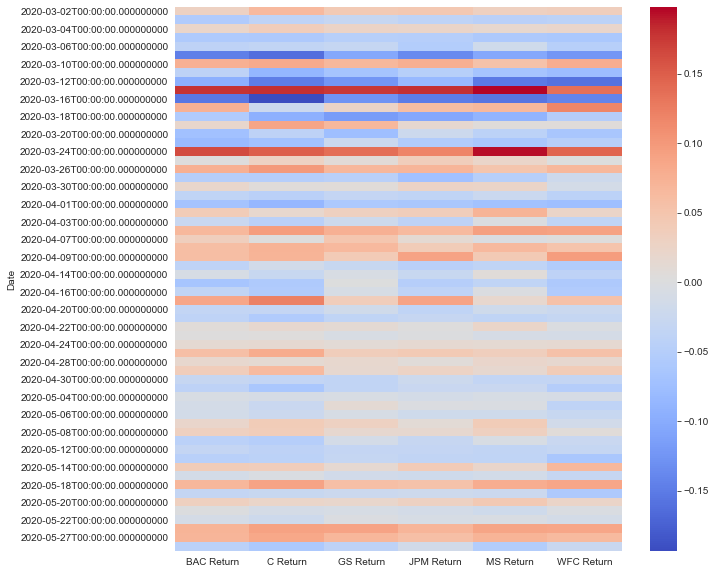

In [46]:
plt.figure(figsize=(10,10))
sns.heatmap(returns.loc['2020-03-01':'2020-05-28'], cmap='coolwarm')

## More technical analysis:

Using cufflinks library to create some Technical Analysis plots:


### COVID-19

Candle plot of Bank of America's stock from Jan 1st 2020 to May 28th 2020:

In [47]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2020-01-01':'2020-05-28'].iplot(kind='candle')

Simple Moving Averages plot of Morgan Stanley for the year 2020:

In [48]:
MS['Close'].loc['2020-01-01':'2020-05-28'].ta_plot(study='sma',periods=[14],title='Simple Moving Averages')

Bollinger Band plot for 30-day averaging:

(Bollinger Bands are a type of statistical chart characterizing the prices and volatility over time of a financial instrument or commodity, using a formulaic method propounded by John Bollinger in the 1980s. They are envelopes plotted at a standard deviation level above and below a simple moving average of the price. They help determine whether prices are high or low on a relative basis.)

With averaging over 7 days period:

In [49]:
bank_stocks['BAC']['Close'].loc['2020-01-01':'2020-05-28'].ta_plot(study='boll', periods=[7])

## Stooq index data for selected Tech, Automotive and Aerospace companies during COVID-19 :

Classical winners in such a virus-caused crisis (mainly farmaceutical stocks and from NASDAQ group):

In [50]:
Apple = data.DataReader('AAPL', 'stooq')
Microsoft = data.DataReader('MSFT.US', 'stooq')
Amazon = data.DataReader('amzn.us', 'stooq')
Google = data.DataReader('GOOGL.US', 'stooq')
Facebook = data.DataReader('FB.US', 'stooq')
Netflix = data.DataReader('NFLX.US', 'stooq')

Amazon and Google (Aplphabet) closing prices:

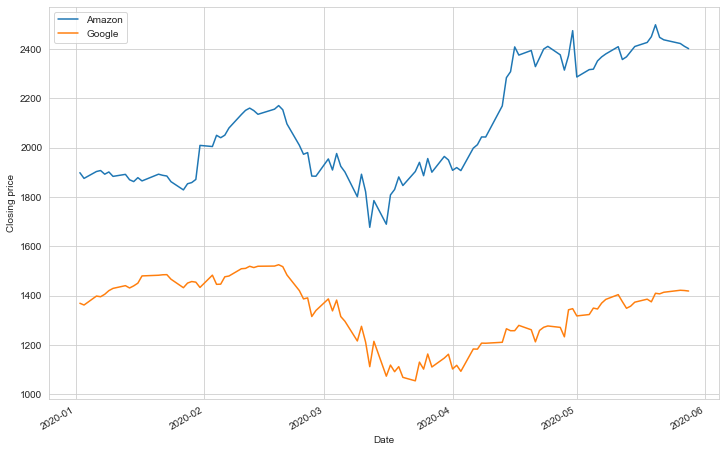

In [51]:
plt.figure(figsize=(12,8))
Amazon['Close'].loc['2020-05-28':'2020-01-01'].plot(label='Amazon')
Google['Close'].loc['2020-05-28':'2020-01-01'].plot(label='Google')
plt.ylabel('Closing price')
plt.legend()

Apple, Microsoft, Facebook and Netflix closing prices:

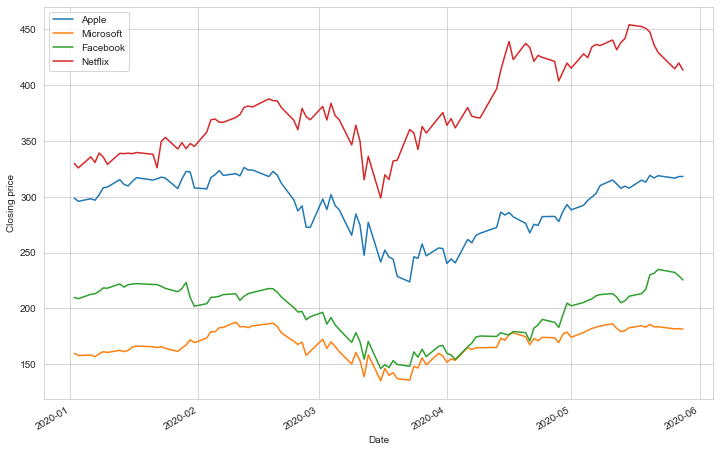

In [52]:
plt.figure(figsize=(12,8))
Apple['Close'].loc['2020-05-28':'2020-01-01'].plot(label='Apple')
Microsoft['Close'].loc['2020-05-28':'2020-01-01'].plot(label='Microsoft')
Facebook['Close'].loc['2020-05-28':'2020-01-01'].plot(label='Facebook')
Netflix['Close'].loc['2020-05-28':'2020-01-01'].plot(label='Netflix')
plt.ylabel('Closing price')
plt.legend()

Quite consistent trends on the stocks from FAANG group!

Pharmaceutical stocks:

In [53]:
Sanofi = data.DataReader('SNY.US', 'stooq')
Novartis = data.DataReader('NVS.US', 'stooq')

Aerospace and Automotive industry:

In [54]:
Airbus = data.DataReader('AIR.DE', 'stooq')
Delta = data.DataReader('DAL.US', 'stooq')
BMW = data.DataReader('BMW.DE', 'stooq')

Selected Pharmaceutical (growing) and industrial (dipping or stagnating) stocks:

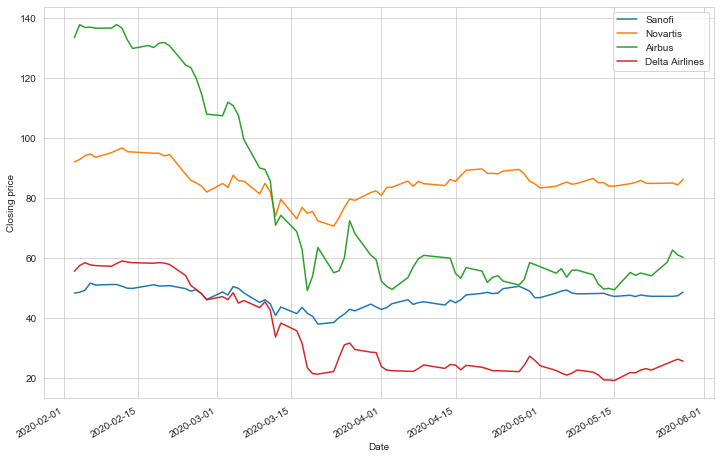

In [55]:
plt.figure(figsize=(12,8))

Sanofi['Close'].loc['2020-05-28':'2020-02-01'].plot(label='Sanofi')
Novartis['Close'].loc['2020-05-28':'2020-02-01'].plot(label='Novartis')

Airbus['Close'].loc['2020-05-28':'2020-02-01'].plot(label='Airbus')
Delta['Close'].loc['2020-05-28':'2020-02-01'].plot(label='Delta Airlines')

plt.ylabel('Closing price')
plt.legend()

Airbus went down by almost 60% and is still not recovering whereas Microsoft is within these two months back at the levels from February:

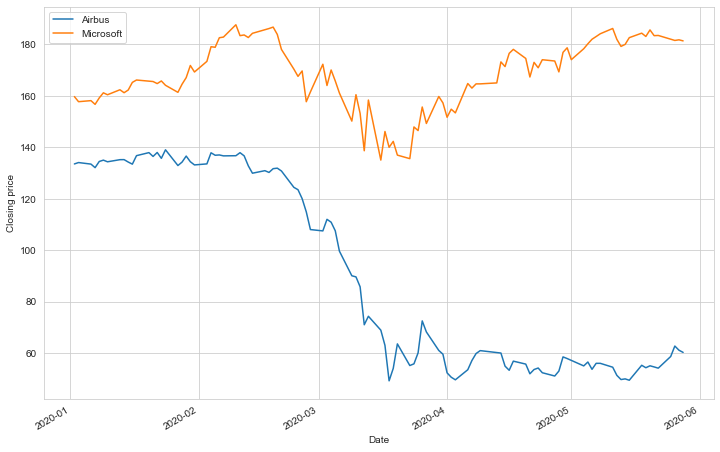

In [56]:
plt.figure(figsize=(12,8))
Airbus['Close'].loc['2020-05-28':'2020-01-01'].plot(label='Airbus')
Microsoft['Close'].loc['2020-05-28':'2020-01-01'].plot(label='Microsoft')
plt.ylabel('Closing price')
plt.legend()

In [57]:
market_tickers = ['Apple', 'Microsoft', 'Amazon', 'Google', 'Facebook', 'Netflix', 'Sanofi', 'Novartis', 'Airbus', 'Delta']

In [58]:
market_stocks = pd.concat([Apple, Microsoft, Amazon, Google, Facebook, Netflix, Sanofi, Novartis, Airbus, Delta], 
                          keys=market_tickers, 
                          axis=1, 
                          names=['Company Ticker', 'Stock Info'])

Checking the data:

In [62]:
market_stocks

Company Ticker   Apple                                     Microsoft  \
Stock Info        Open    High     Low   Close      Volume      Open   
Date                                                                   
2015-06-01      120.93  121.11  119.84  120.29  34844287.0    42.589   
2015-06-02      119.68  120.40  119.21  119.76  36498756.0    42.492   
2015-06-03      120.41  120.67  119.71  119.90  33618936.0    42.873   
2015-06-04      119.44  120.33  118.81  119.25  41720638.0    42.344   
2015-06-05      119.40  119.55  118.29  118.56  38657189.0    41.903   
...                ...     ...     ...     ...         ...       ...   
2020-05-22      315.77  319.23  315.35  318.89  20450754.0   183.190   
2020-05-25         NaN     NaN     NaN     NaN         NaN       NaN   
2020-05-26      323.50  324.24  316.50  316.73  31380454.0   186.340   
2020-05-27      316.14  318.71  313.09  318.11  28236274.0   180.200   
2020-05-28      316.77  323.44  315.63  318.25  33449103.0   180.740   

Company Ticker                                          ...  Airbus          \
Stock Info          High      Low    Close      Volume  ...    Open    High   
Date                                                    ...                   
2015-06-01       43.2340   42.192   42.746  31863644.0  ...  56.969  58.058   
2015-06-02       42.8540   42.192   42.467  23753457.0  ...  57.668  57.835   
2015-06-03       43.2060   42.372   42.400  30940759.0  ...  57.509  58.516   
2015-06-04       42.6810   41.815   41.958  30657230.0  ...  56.717  57.276   
2015-06-05       42.1030   41.488   41.759  28107572.0  ...  56.000  56.187   
...                  ...      ...      ...         ...  ...     ...     ...   
2020-05-22      184.4600  182.540  183.510  20826898.0  ...  53.800  55.290   
2020-05-25           NaN      NaN      NaN         NaN  ...  55.000  58.850   
2020-05-26      186.5000  181.100  181.570  36073609.0  ...  59.600  63.260   
2020-05-27      181.9877  176.600  181.810  39517146.0  ...  63.500  64.230   
2020-05-28      184.1474  180.380  181.400  33831824.0  ...  62.300  62.800   

Company Ticker                             Delta                          \
Stock Info         Low   Close    Volume    Open    High     Low   Close   
Date                                                                       
2015-06-01      56.484  57.630  342334.0  39.074  40.503  38.831  40.102   
2015-06-02      56.419  57.295  350226.0  38.874  39.445  38.766  39.074   
2015-06-03      56.867  57.286  198896.0  39.354  39.581  38.841  39.101   
2015-06-04      55.674  56.642  212482.0  39.246  39.888  38.378  38.812   
2015-06-05      54.966  55.749  311166.0  38.719  39.019  38.233  38.793   
...                ...     ...       ...     ...     ...     ...     ...   
2020-05-22      52.940  54.120  274792.0  23.240  23.400  22.230  22.690   
2020-05-25      54.550  58.650  452748.0     NaN     NaN     NaN     NaN   
2020-05-26      59.180  62.720  582582.0  24.480  25.865  24.280  25.650   
2020-05-27      60.700  61.100  626255.0  27.670  27.850  24.730  26.320   
2020-05-28      59.820  60.250  493105.0  26.250  26.360  24.950  25.660   

Company Ticker              
Stock Info          Volume  
Date                        
2015-06-01      19554013.0  
2015-06-02      20382603.0  
2015-06-03      10933148.0  
2015-06-04      14807844.0  
2015-06-05      10944758.0  
...                    ...  
2020-05-22      37139330.0  
2020-05-25             NaN  
2020-05-26      78557082.0  
2020-05-27      92711991.0  
2020-05-28      54071471.0  

[1290 rows x 50 columns]

## Market Returns:

In [85]:
market_returns = pd.DataFrame()
for tick in market_tickers:
    market_returns[tick+' Return'] = market_stocks[tick]['Close'].pct_change()

Isolating crisis period (Jan 1st - May 28th (today))

In [90]:
market_returns_crisis = market_returns.loc['2020-02-15':'2020-05-28']
market_returns_crisis

Apple Return  Microsoft Return  Amazon Return  Google Return  \
Date                                                                       
2020-02-17      0.000000          0.000000       0.000000       0.000000   
2020-02-18     -0.018299          0.010090       0.009743       0.000467   
2020-02-19      0.014490          0.003008       0.006750       0.003574   
2020-02-20     -0.010256         -0.015260      -0.007889      -0.005168   
2020-02-21     -0.022665         -0.031646      -0.026534      -0.022103   
...                  ...               ...            ...            ...   
2020-05-22      0.006438          0.000436      -0.004030       0.004613   
2020-05-25      0.000000          0.000000       0.000000       0.000000   
2020-05-26     -0.006773         -0.010572      -0.006164       0.005753   
2020-05-27      0.004357          0.001322      -0.004736      -0.000767   
2020-05-28      0.000440         -0.002255      -0.003854      -0.001436   

            Facebook Return  Netflix Return  Sanofi Return  Novartis Return  \
Date                                                                          
2020-02-17         0.000000        0.000000       0.000000         0.000000   
2020-02-18         0.016902        0.019401       0.024234        -0.004402   
2020-02-19        -0.001423       -0.004100      -0.008408         0.000200   
2020-02-20        -0.013380       -0.000492       0.000789        -0.009568   
2020-02-21        -0.020505       -0.015363       0.001970         0.004889   
...                     ...             ...            ...              ...   
2020-05-22         0.015212       -0.015885      -0.002951        -0.000941   
2020-05-25         0.000000        0.000000       0.000000         0.000000   
2020-05-26        -0.011536       -0.033891      -0.000634         0.001649   
2020-05-27        -0.013178        0.012344       0.004654        -0.007055   
2020-05-28        -0.016060       -0.015361       0.025058         0.021670   

            Airbus Return  Delta Return  
Date                                     
2020-02-17       0.007542      0.000000  
2020-02-18      -0.005194     -0.003060  
2020-02-19       0.011210      0.003309  
2020-02-20       0.001519     -0.002222  
2020-02-21      -0.008340     -0.008736  
...                   ...           ...  
2020-05-22      -0.008791     -0.020294  
2020-05-25       0.083703      0.000000  
2020-05-26       0.069395      0.130454  
2020-05-27      -0.025829      0.026121  
2020-05-28      -0.013912     -0.025076  

[73 rows x 10 columns]

Average daily returns between mid-Feb 2020 and May 28th 2020:

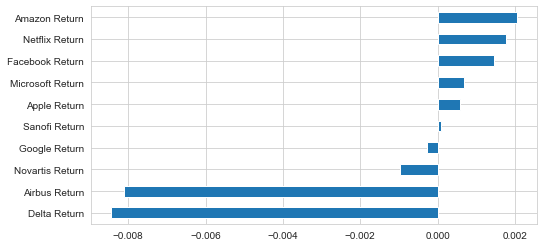

In [92]:
plt.figure(figsize=(8,4))
market_returns_crisis.mean().sort_values(ascending=True).plot(kind='barh')

Amazon's race to historical peaks is visible whereas crisis looms over the Automotive and Aerospace industry.

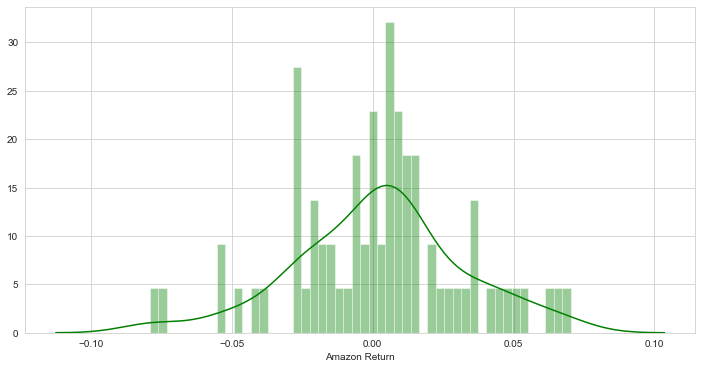

In [101]:
plt.figure(figsize=(12,6))
sns.distplot(market_returns_crisis['Amazon Return'], 
             color='green', 
             bins=50,  
             hist_kws=dict(edgecolor="w", linewidth=1)
            )

Larger discrepancies on Delta Airlines:

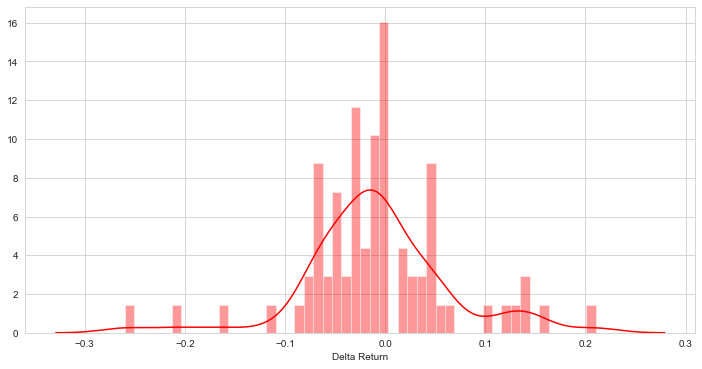

In [102]:
plt.figure(figsize=(12,6))
sns.distplot(market_returns_crisis['Delta Return'], 
             color='red', 
             bins=50,  
             hist_kws=dict(edgecolor="w", linewidth=1)
            )

Classic correlation investigation with pairplot:

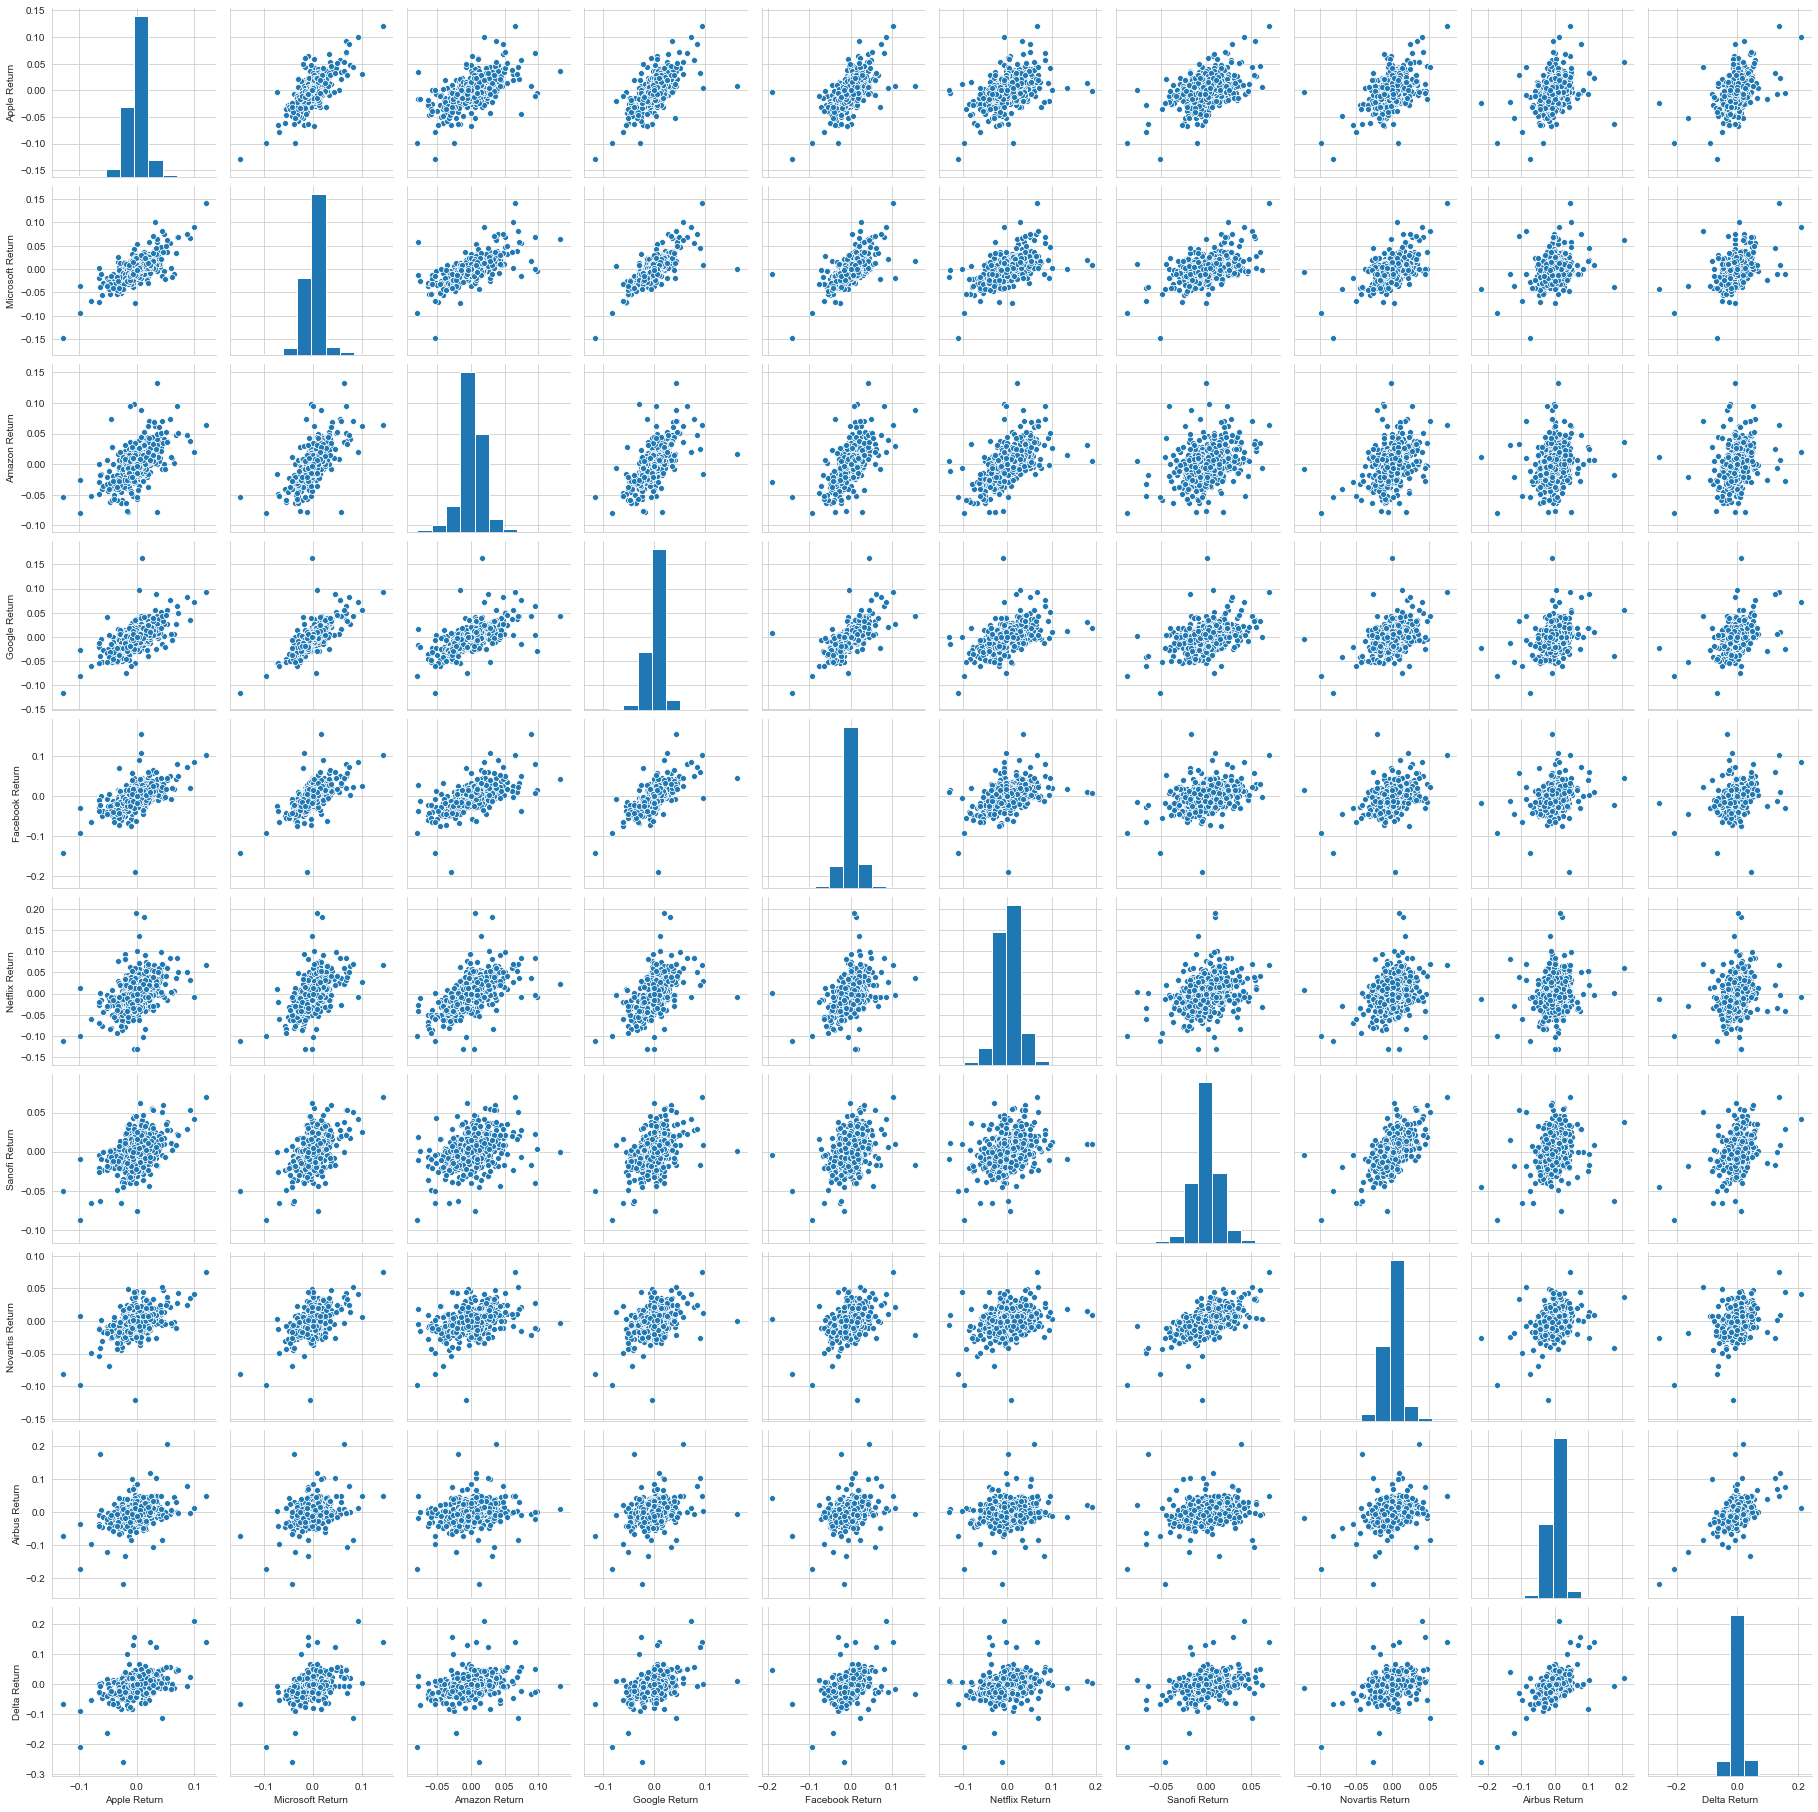

In [65]:
sns.pairplot(market_returns)

Microsoft and Apple look noticably correlated (it is also related to personal relations between Warren Buffet and Bill Gates, who own stocks of each others' companies).

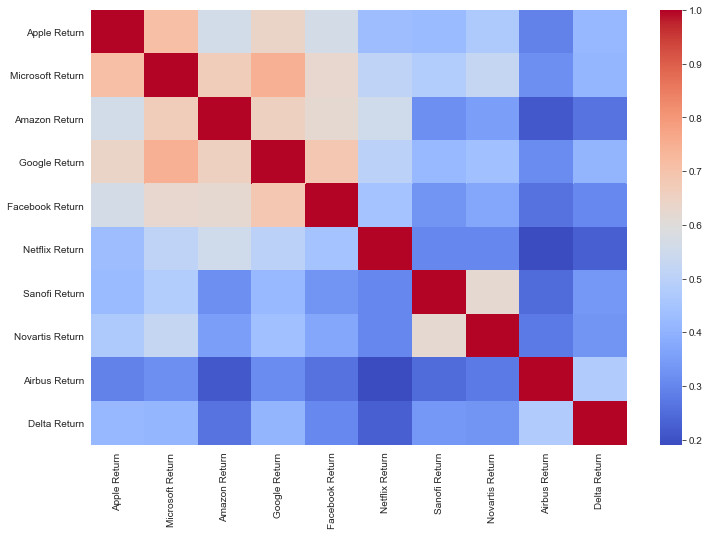

In [68]:
plt.figure(figsize=(12,8))
sns.heatmap(market_returns.corr(), cmap='coolwarm')

Heatmap above shows, that predictably: daily returns for tech and pharmaceutical stocks are correlated. The most for Google and Microsoft (	0.749647).

Clustermap:

<Figure size 864x576 with 0 Axes>

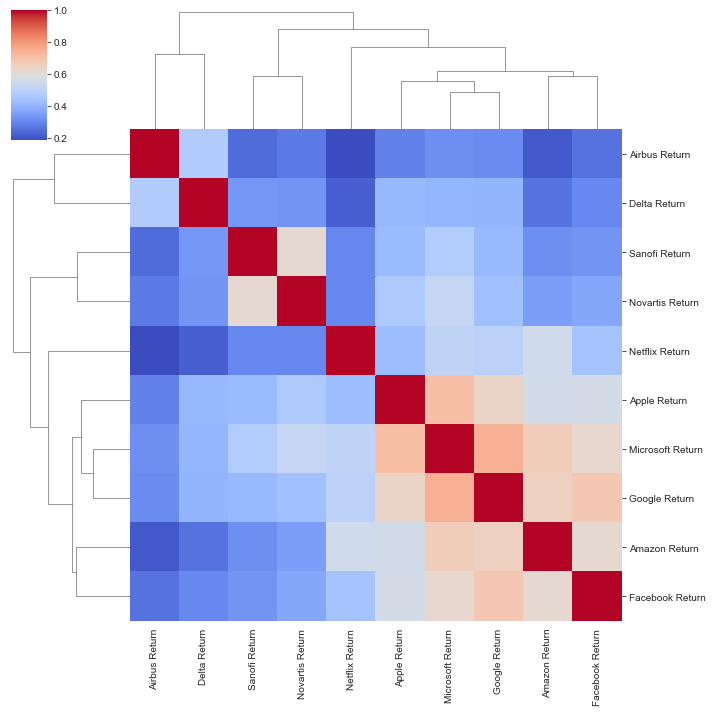

In [63]:
plt.figure(figsize=(12,8))
sns.clustermap(market_returns.corr(), cmap='coolwarm')

The dendrogram above correctly points out that there are 3 main clusters of interest (the longest vertical line without crossing method): Tech, Pharmaceutics and Aerospace/Automotive.